<a href="https://colab.research.google.com/github/ShivaniMareddy/Feature_selection/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variance Threshold

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'salary': [5000, 6000, 7000, 8000, 9000],
    'country_code': [1, 1, 1, 1, 1]
})

data


,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.5)
selector.fit_transform(data)
selected_features=data.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['age', 'salary'], dtype='object')


In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Blood_Pressure': [120, 130, 125, 140, 135],
    'Cholesterol': [200, 220, 210, 230, 240],
    'Gender': [0, 1, 1, 0, 1],          # encoded
    'Country_Code': [1, 1, 1, 1, 1],    # constant
    'Hospital_ID': [101, 101, 101, 101, 101],  # constant
    'Machine_Version': [1, 1, 1, 1, 2]  # almost constant
})

data


,Age,Blood_Pressure,Cholesterol,Gender,Country_Code,Hospital_ID,Machine_Version
0,25,120,200,0,1,101,1
1,30,130,220,1,1,101,1
2,35,125,210,1,1,101,1
3,40,140,230,0,1,101,1
4,45,135,240,1,1,101,2


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# create selector
selector = VarianceThreshold(threshold=0.01)

# fit and transform
X_selected = selector.fit_transform(data)

X_selected


array([[ 25, 120, 200,   0,   1],
       [ 30, 130, 220,   1,   1],
       [ 35, 125, 210,   1,   1],
       [ 40, 140, 230,   0,   1],
       [ 45, 135, 240,   1,   2]])

In [ ]:
# get column mask (True = kept, False = removed)
mask = selector.get_support()

# print remaining columns
selected_columns = data.columns[mask]
print("Selected Features:", list(selected_columns))


Selected Features: ['Age', 'Blood_Pressure', 'Cholesterol', 'Gender', 'Machine_Version']


In [ ]:
clean_data = data[selected_columns]
clean_data


,Age,Blood_Pressure,Cholesterol,Gender,Machine_Version
0,25,120,200,0,1
1,30,130,220,1,1
2,35,125,210,1,1
3,40,140,230,0,1
4,45,135,240,1,2


## Correlation Coefficient

In [ ]:
import pandas as pd
import numpy as np
data=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
data

,size_sqft,titles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [ ]:
correlation_matrix=data.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


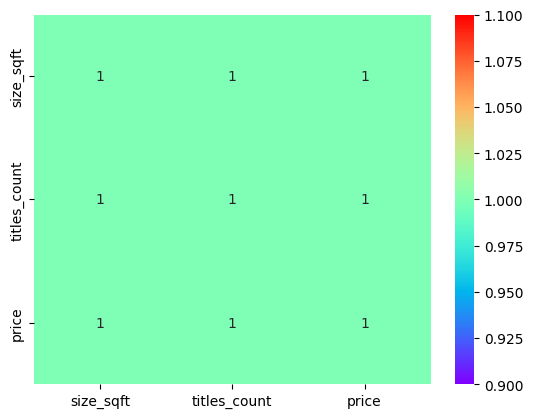

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow')
plt.show()

In [ ]:
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print("Highly Correlated Features to Drop:", to_drop)

Highly Correlated Features to Drop: ['titles_count', 'price']


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'house_size': [1000,1500,2000,2500,3000],
    'num_tiles': [500,750,1000,1250,1500],            # highly correlated with size
    'construction_cost': [200000,300000,400000,500000,600000], # highly correlated with size
    'bedrooms': [2,3,3,4,5],
    'market_price': [250000,350000,450000,550000,650000]  # target
})

data


,house_size,num_tiles,construction_cost,bedrooms,market_price
0,1000,500,200000,2,250000
1,1500,750,300000,3,350000
2,2000,1000,400000,3,450000
3,2500,1250,500000,4,550000
4,3000,1500,600000,5,650000


In [ ]:
correlation_matrix=data.corr()
print(correlation_matrix)

                   house_size  num_tiles  construction_cost  bedrooms  \
house_size           1.000000   1.000000           1.000000  0.970725   
num_tiles            1.000000   1.000000           1.000000  0.970725   
construction_cost    1.000000   1.000000           1.000000  0.970725   
bedrooms             0.970725   0.970725           0.970725  1.000000   
market_price         1.000000   1.000000           1.000000  0.970725   

                   market_price  
house_size             1.000000  
num_tiles              1.000000  
construction_cost      1.000000  
bedrooms               0.970725  
market_price           1.000000  


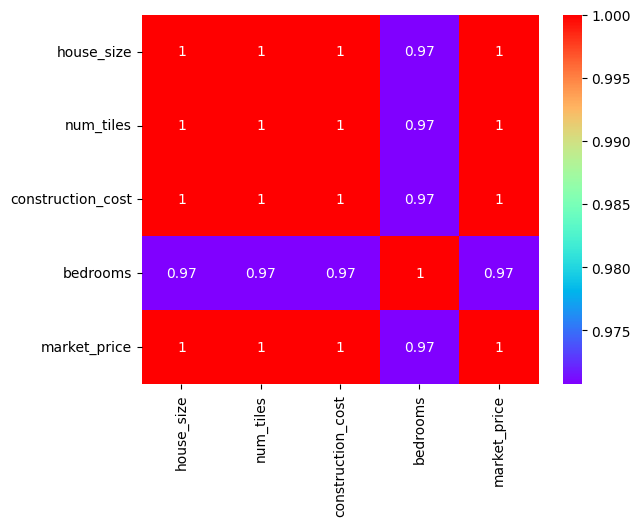

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow')
plt.show()

In [ ]:
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print("Highly Correlated Features to Drop:", to_drop)

Highly Correlated Features to Drop: ['num_tiles', 'construction_cost', 'bedrooms', 'market_price']


## Chi-Square Test

In [ ]:
import pandas as pd

X = pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})

y = [0,1,1,0,1]


In [ ]:
from sklearn.feature_selection import chi2

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['married', 'income'], dtype='object')


In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Gender': ['Male','Female','Male','Male','Female','Male','Female','Male'],
    'Married': ['Yes','No','Yes','Yes','No','Yes','No','Yes'],
    'Education': ['Graduate','Graduate','Non-Graduate','Graduate','Non-Graduate','Graduate','Graduate','Non-Graduate'],
    'ApplicantIncome': [50000,30000,40000,60000,25000,70000,32000,45000],
    'Property_Area': ['Urban','Rural','Urban','Urban','Rural','Urban','Rural','Urban'],
    'Favorite_Color': ['Red','Blue','Green','Blue','Green','Red','Blue','Green'],
    'Loan_Status': ['Approved','Rejected','Approved','Approved','Rejected','Approved','Rejected','Approved']
})

data


,Gender,Married,Education,ApplicantIncome,Property_Area,Favorite_Color,Loan_Status
0,Male,Yes,Graduate,50000,Urban,Red,Approved
1,Female,No,Graduate,30000,Rural,Blue,Rejected
2,Male,Yes,Non-Graduate,40000,Urban,Green,Approved
3,Male,Yes,Graduate,60000,Urban,Blue,Approved
4,Female,No,Non-Graduate,25000,Rural,Green,Rejected
5,Male,Yes,Graduate,70000,Urban,Red,Approved
6,Female,No,Graduate,32000,Rural,Blue,Rejected
7,Male,Yes,Non-Graduate,45000,Urban,Green,Approved


In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']


In [ ]:
y = y.map({'Rejected':0, 'Approved':1})


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

X_encoded.head()


,Gender,Married,Education,ApplicantIncome,Property_Area,Favorite_Color
0,1,1,0,5,1,2
1,0,0,0,1,0,0
2,1,1,1,3,1,1
3,1,1,0,6,1,0
4,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_scaled, y)

scores = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Chi2 Score': chi_selector.scores_
})

scores.sort_values(by='Chi2 Score', ascending=False)


,Feature,Chi2 Score
0,Gender,3.000000
1,Married,3.000000
4,Property_Area,3.000000
3,ApplicantIncome,1.224490
5,Favorite_Color,0.804762
2,Education,0.022222


In [ ]:
selector = SelectKBest(score_func=chi2, k=4)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X_scaled.columns[selector.get_support()]

print("Selected Important Features:")
print(list(selected_features))


Selected Important Features:
['Gender', 'Married', 'ApplicantIncome', 'Property_Area']


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print(X.head())
print(X.shape)
print(y)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=50)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Step 1: Scale the data (VERY IMPORTANT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Step 2: Use Logistic Regression with more iterations
model = LogisticRegression(max_iter=5000)

# Step 3: Forward Feature Selection
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=5,
    direction='forward',
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train)

# Step 4: Get selected features
selected_features = X_train.columns[sfs.get_support()]

print("Selected Features:", list(selected_features))


Selected Features: ['mean radius', 'worst radius', 'worst texture', 'worst smoothness', 'worst concavity']


In [ ]:
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=5,
    direction='backward',
    n_jobs=-1   # speeds up training
)

sfs.fit(X_train_scaled, y_train)

# Step 4: Get selected features
selected_features = X_train.columns[sfs.get_support()]

print("Selected Features:", list(selected_features))

Selected Features: ['worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst fractal dimension']


In [ ]:
from sklearn.feature_selection import RFE

# Step 2: Create model with higher iterations (fix convergence warning)
model = LogisticRegression(max_iter=5000)

# Step 3: Apply RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Step 4: Get selected feature names
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", list(selected_features))

Selected Features: ['radius error', 'worst radius', 'worst texture', 'worst area', 'worst concave points']
